# Integration of genetic determinants and GSM: preliminary analysis

### load in modules

In [157]:
from cameo import pfba
import cobra
import json
import os
import pandas as pd
from cameo import models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from scipy import stats

### load model

In [158]:
m = models.bigg.iML1515

# gene dictionaries for mapping between ID and names
gene_name_dic = {}
for g in m.genes:
    gene_name_dic[g.name] = g.id
    
gene_name_dic2 = {}
for g in m.genes:
    gene_name_dic2[g.id] = g.name

### load in Kmers data

In [159]:
filename = 'Data/Kmer_results_AMRgenes_locusTags_bothdirections.xlsx'
Tobramycin = pd.read_excel(filename, 'Tobramycin') #for an earlier version of Excel, you may need to use the file extension of 'xls'
Gentamicin = pd.read_excel(filename, 'Gentamicin')
Tetracycline = pd.read_excel(filename, 'Tetracycline')
Levofloxacin = pd.read_excel(filename, 'Levofloxacin')
#Meropenem = pd.read_excel(filename, 'Meropenem')
Ciprofloxacin = pd.read_excel(filename, 'Ciprofloxacin')
#Cefuroxime = pd.read_excel(filename, 'Cefuroxime')
Cefoxitin = pd.read_excel(filename, 'Cefoxitin')
Cefepime = pd.read_excel(filename, 'Cefepime')
Aztreonam = pd.read_excel(filename, 'Aztreonam')
Ampicillin = pd.read_excel(filename, 'Ampicillin')
Trimethoprim = pd.read_excel(filename, 'Trimethoprim')


antibiotics_kmers = {'Tobramycin' : Tobramycin, 
                     'Tetracycline' : Tetracycline, 
                     'Levofloxacin' : Levofloxacin,
                     'Gentamicin' : Gentamicin, 
                     'Ciprofloxacin' : Ciprofloxacin, 
                     'Ampicillin' : Ampicillin, 
                     'Cefoxitin' : Cefoxitin, 
                     'Cefepime' : Cefepime, 
                     'Aztreonam' : Aztreonam, 
                     'Trimethoprim' : Trimethoprim}

### Load in SNPs data

In [160]:
filename = 'Data/SNPs_results_AMRgenes_locusTags.xlsx'
Levofloxacin = pd.read_excel(filename, 'Levofloxacin')
Meropenem = pd.read_excel(filename, 'Meropenem')
Ciprofloxacin = pd.read_excel(filename, 'Ciprofloxacin')



antibiotics_snps = {
                     'Levofloxacin' : Levofloxacin,
                     'Meropenem' : Meropenem, 
                     'Ciprofloxacin' : Ciprofloxacin}

### Extract genes from top 10% features from K-mers

In [161]:
# Get top 10% of genesfrom old results

kmers10 = {}
for a in antibiotics_kmers:
    kmers10[a] = int(np.round(len(antibiotics_kmers[a]['Locus Tag'])*0.1))


genes_kmers = []
for a in antibiotics_kmers:
    for ind, g in enumerate(antibiotics_kmers[a]['Locus Tag'][0:kmers10[a]]):
        if str(g) != 'nan':
            if g != 0:
                for gene in m.genes:
                    if gene.id != 's0001':
                        if gene.id in g or gene.name in g:
                            genes_kmers.append(gene.id)
                
genes_kmers = list(set(genes_kmers))



# create new dataframe with just top 10%
antibiotics_kmers10 = {}
for a in antibiotics_kmers:
    antibiotics_kmers10[a] = antibiotics_kmers[a].iloc[0:kmers10[a]]
    
print('number of genes from Kmer results (10%): ', len(genes_kmers))






genes_kmers_cip = []
a = 'Ciprofloxacin'
for ind, g in enumerate(antibiotics_kmers[a]['Locus Tag'][0:kmers10[a]]):
    if str(g) != 'nan':
        if g != 0:
            for gene in m.genes:
                if gene.id != 's0001':
                    if gene.id in g or gene.name in g:
                        genes_kmers_cip.append(gene.id)
                
genes_kmers_cip = list(set(genes_kmers_cip))
print('cip ', len(genes_kmers_cip))


genes_kmers_lev = []
a = 'Levofloxacin'
for ind, g in enumerate(antibiotics_kmers[a]['Locus Tag'][0:kmers10[a]]):
    if str(g) != 'nan':
        if g != 0:
            for gene in m.genes:
                if gene.id != 's0001':
                    if gene.id in g or gene.name in g:
                        genes_kmers_lev.append(gene.id)
                
genes_kmers_lev = list(set(genes_kmers_lev))
print('lev ', len(genes_kmers_lev))




genes_kmers_tob = []
a = 'Tobramycin'
for ind, g in enumerate(antibiotics_kmers[a]['Locus Tag'][0:kmers10[a]]):
    if str(g) != 'nan':
        if g != 0:
            for gene in m.genes:
                if gene.id != 's0001':
                    if gene.id in g or gene.name in g:
                        genes_kmers_tob.append(gene.id)
                
genes_kmers_tob = list(set(genes_kmers_tob))
print('tob ', len(genes_kmers_tob))


genes_kmers_azt = []
a = 'Aztreonam'
for ind, g in enumerate(antibiotics_kmers[a]['Locus Tag'][0:kmers10[a]]):
    if str(g) != 'nan':
        if g != 0:
            for gene in m.genes:
                if gene.id != 's0001':
                    if gene.id in g or gene.name in g:
                        genes_kmers_azt.append(gene.id)
                
genes_kmers_azt = list(set(genes_kmers_azt))
print('azt ', len(genes_kmers_azt))




genes_kmers_cefo = []
a = 'Cefoxitin'
for ind, g in enumerate(antibiotics_kmers[a]['Locus Tag'][0:kmers10[a]]):
    if str(g) != 'nan':
        if g != 0:
            for gene in m.genes:
                if gene.id != 's0001':
                    if gene.id in g or gene.name in g:
                        genes_kmers_cefo.append(gene.id)
                
genes_kmers_cefo = list(set(genes_kmers_cefo))
print('cefo ', len(genes_kmers_cefo))


genes_kmers_cefe = []
a = 'Cefepime'
for ind, g in enumerate(antibiotics_kmers[a]['Locus Tag'][0:kmers10[a]]):
    if str(g) != 'nan':
        if g != 0:
            for gene in m.genes:
                if gene.id != 's0001':
                    if gene.id in g or gene.name in g:
                        genes_kmers_cefe.append(gene.id)
                
genes_kmers_cefe = list(set(genes_kmers_cefe))
print('cefe ', len(genes_kmers_cefe))




genes_kmers_amp = []
a = 'Ampicillin'
for ind, g in enumerate(antibiotics_kmers[a]['Locus Tag'][0:kmers10[a]]):
    if str(g) != 'nan':
        if g != 0:
            for gene in m.genes:
                if gene.id != 's0001':
                    if gene.id in g or gene.name in g:
                        genes_kmers_amp.append(gene.id)
                
genes_kmers_amp = list(set(genes_kmers_amp))
print('amp ', len(genes_kmers_amp))


genes_kmers_trim = []
a = 'Trimethoprim'
for ind, g in enumerate(antibiotics_kmers[a]['Locus Tag'][0:kmers10[a]]):
    if str(g) != 'nan':
        if g != 0:
            for gene in m.genes:
                if gene.id != 's0001':
                    if gene.id in g or gene.name in g:
                        genes_kmers_trim.append(gene.id)
                
genes_kmers_trim = list(set(genes_kmers_trim))
print('trim ', len(genes_kmers_trim))


genes_kmers_tet = []
a = 'Tetracycline'
for ind, g in enumerate(antibiotics_kmers[a]['Locus Tag'][0:kmers10[a]]):
    if str(g) != 'nan':
        if g != 0:
            for gene in m.genes:
                if gene.id != 's0001':
                    if gene.id in g or gene.name in g:
                        genes_kmers_tet.append(gene.id)
                
genes_kmers_tet = list(set(genes_kmers_tet))
print('tet ', len(genes_kmers_tet))


genes_kmers_gent = []
a = 'Gentamicin'
for ind, g in enumerate(antibiotics_kmers[a]['Locus Tag'][0:kmers10[a]]):
    if str(g) != 'nan':
        if g != 0:
            for gene in m.genes:
                if gene.id != 's0001':
                    if gene.id in g or gene.name in g:
                        genes_kmers_gent.append(gene.id)
                
genes_kmers_gent = list(set(genes_kmers_gent))
print('gent ', len(genes_kmers_gent))




genes_kmers_all = {}
genes_kmers_all['ciprofloxacin'] = genes_kmers_cip
genes_kmers_all['levofloxacin'] = genes_kmers_lev
genes_kmers_all['aztreonam'] = genes_kmers_azt
genes_kmers_all['cefepime'] = genes_kmers_cefe
genes_kmers_all['cefoxitin'] = genes_kmers_cefo
genes_kmers_all['tobramycin'] = genes_kmers_tob
genes_kmers_all['trimethoprim'] = genes_kmers_trim
genes_kmers_all['tetracycline'] = genes_kmers_tet
genes_kmers_all['gentamicin'] = genes_kmers_gent
genes_kmers_all['ampicillin'] = genes_kmers_amp

number of genes from Kmer results (10%):  97
cip  12
lev  16
tob  1
azt  20
cefo  19
cefe  9
amp  13
trim  7
tet  9
gent  7


### Extract top 10% of genes from SNPs 

In [162]:


snps10 = {}
for a in antibiotics_snps:
    snps10[a] = int(np.round(len(antibiotics_snps[a]['Locus Tag'])*0.1))


genes_snps = []
for a in antibiotics_snps:
    for ind, g in enumerate(antibiotics_snps[a]['Locus Tag'][0:snps10[a]]):
        
        if str(g) != 'nan':
            for gene in m.genes:
                if gene.id != 's0001':
                    if gene.id in g or gene.name in g:
                        genes_snps.append(gene.id)
                
genes_snps = list(set(genes_snps))



# create new dataframe with just top 10%
antibiotics_snps10 = {}
for a in antibiotics_snps:
    antibiotics_snps10[a] = antibiotics_snps[a].iloc[0:snps10[a]]
    
print('number of genes from SNPs results (10%): ', len(genes_snps))




genes_snps_cip = []
a = 'Ciprofloxacin'
for ind, g in enumerate(antibiotics_snps[a]['Locus Tag'][0:snps10[a]]):
    if str(g) != 'nan':
        for gene in m.genes:
            if gene.id != 's0001':
                if gene.id in g or gene.name in g:
                    genes_snps_cip.append(gene.id)
                
genes_snps_cip = list(set(genes_snps_cip))
print('cip ', len(genes_snps_cip))


genes_snps_lev = []
a = 'Levofloxacin'
for ind, g in enumerate(antibiotics_snps[a]['Locus Tag'][0:snps10[a]]):
    if str(g) != 'nan':
        for gene in m.genes:
            if gene.id != 's0001':
                if gene.id in g or gene.name in g:
                    genes_snps_lev.append(gene.id)
                
genes_snps_lev = list(set(genes_snps_lev))
print('lev ', len(genes_snps_lev))



genes_snps_mero = []
a = 'Meropenem'
for ind, g in enumerate(antibiotics_snps[a]['Locus Tag'][0:snps10[a]]):
    if str(g) != 'nan':
        for gene in m.genes:
            if gene.id != 's0001':
                if gene.id in g or gene.name in g:
                    genes_snps_mero.append(gene.id)
                
genes_snps_mero = list(set(genes_snps_mero))
print('mero ', len(genes_snps_mero))


genes_snps_all = {}
genes_snps_all['ciprofloxacin'] = genes_snps_cip
genes_snps_all['levofloxacin'] = genes_snps_lev
genes_snps_all['meropenem'] = genes_snps_mero


number of genes from SNPs results (10%):  202
cip  113
lev  49
mero  85


### Merge the genes together

In [163]:
genes_ALL = set(genes_snps + genes_kmers)

In [164]:
len(genes_ALL)

289

### Dataframe of the results

In [165]:
df_AB_kmers = pd.DataFrame(index = genes_kmers)
count = 0
for a in antibiotics_kmers10:
    a_col = []
    for g in genes_kmers:
        max_weight = 0.0
        for ind, gene in enumerate(antibiotics_kmers10[a]['Locus Tag']):
            if str(gene) != 'nan':
                if gene != 0:
                    if g in gene:
                        if antibiotics_kmers10[a].iloc[ind, 4] > max_weight:
                            max_weight = antibiotics_kmers10[a].iloc[ind, 4]
        a_col.append(max_weight)
    df_AB_kmers.insert(count, column = a, value = a_col)
    count += 1

# binary version of dataframe
df_AB_kmers_bin = df_AB_kmers.copy()
df_AB_kmers_bin[df_AB_kmers_bin> 0] = 1

In [166]:
df_AB_snps = pd.DataFrame(index = genes_snps)
count = 0
for a in antibiotics_snps10:
    a_col = []
    for g in genes_snps:
        max_weight = 0.0
        for ind, gene in enumerate(antibiotics_snps10[a]['Locus Tag']):
            if str(gene) != 'nan':
                if g in gene:
                    if antibiotics_snps10[a].iloc[ind, 6] > max_weight:
                        max_weight = antibiotics_snps10[a].iloc[ind, 6]
        a_col.append(max_weight)
    df_AB_snps.insert(count, column = a, value = a_col)
    count += 1
    
# binary version of dataframe
df_AB_snps_bin = df_AB_snps.copy()
df_AB_snps_bin[df_AB_snps_bin> 0] = 1

In [167]:
df_AB_all = pd.DataFrame(index = genes_ALL)
count = 0

for ind, col_name in enumerate(df_AB_kmers.columns):

    col = []
    for g in genes_ALL:
        if col_name not in df_AB_snps.columns:
            if g in df_AB_kmers.index:
                col.append(df_AB_kmers[col_name][g])
            else:
                col.append(0)
        else:
            if g in df_AB_kmers.index and g in df_AB_snps.index:
                col.append(np.max([df_AB_kmers[col_name][g], df_AB_snps[col_name][g]]))
            elif g in df_AB_kmers.index and not g in df_AB_snps.index: 
                col.append(df_AB_kmers[col_name][g])
            elif g not in df_AB_kmers.index and g in df_AB_snps.index:  
                col.append(df_AB_snps[col_name][g])
            
    
    df_AB_all.insert(count, column = col_name, value = col)
    count += 1
    
# column for antibiotic just in SNPs
for ind, col_name in enumerate(df_AB_snps.columns):
    col = []
    if col_name not in df_AB_kmers.columns:
        for g in genes_ALL:
            if g in df_AB_snps.index:
                #print(df_AB_snps[col_name][g])
                col.append(df_AB_snps[col_name][g])
                
            else:
                #print(0)
                col.append(0)
                
        print(len(col))
        df_AB_all.insert(count, column = col_name, value = col)
        count += 1
        
    
# binary 
df_AB_all_bin = df_AB_all.copy()
df_AB_all_bin[df_AB_all_bin> 0] = 1

# save dataframes
#df_AB_all.to_pickle('GSMGeneticDeterminants_bothdir.pkl')

289


# 2.  Assessment of metabolic genes in determining resistance (Figure 3)

In [168]:
# total number of genes in the top 20% of genes
total_genes_all_kmers = {}
met_genes_all_kmers = {}

for a in antibiotics_kmers10:
    gene_list10_all_kmers = list(antibiotics_kmers10[a]['Gene ID'].values)
    total_genes_all_kmers[a] = len(list(filter(None, list(set(gene_list10_all_kmers)))))
    met_genes_all_kmers[a] = df_AB_kmers_bin[a].sum()
for a in antibiotics_snps10:
    if a not in antibiotics_kmers10:
        total_genes_all_kmers[a] = 0.0
        met_genes_all_kmers[a] = 0.0



# total number of genes in the top 20% of genes
total_genes_all_snps = {}
met_genes_all_snps = {}
for a in antibiotics_kmers10:
    if a in antibiotics_snps10:
        gene_list10_all_snps = list(antibiotics_snps10[a]['gene'].values)
        total_genes_all_snps[a] = len(list(filter(None, list(set(gene_list10_all_snps)))))
        met_genes_all_snps[a] = df_AB_snps_bin[a].sum()
    else:
        total_genes_all_snps[a] = 0.0
        met_genes_all_snps[a] = 0.0
for a in antibiotics_snps10:
    if a not in antibiotics_kmers10:
        gene_list10_all_snps = list(antibiotics_snps10[a]['gene'].values)
        total_genes_all_snps[a] = (len(list(set(gene_list10_all_snps))))
        met_genes_all_snps[a] = df_AB_snps_bin[a].sum()

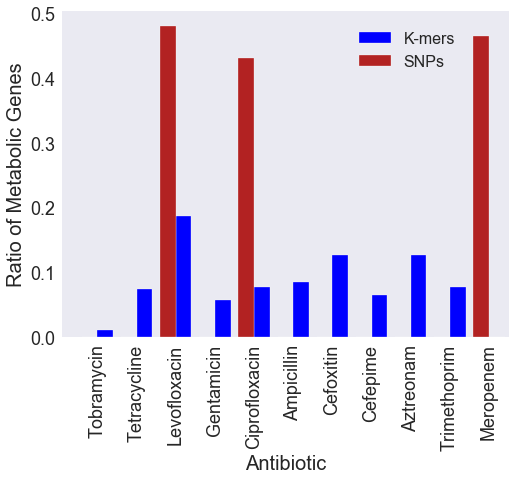

In [169]:

plt.style.use('seaborn')

percent_kmers = []
index = []
for i, j in met_genes_all_kmers.items():
    if j != 0.0:
        percent_kmers.append(j/total_genes_all_kmers[i])
    else:
        percent_kmers.append(0.0)
    index.append(i)
    
percent_snps = []
for i, j in met_genes_all_snps.items():
    if j != 0.0:
        percent_snps.append(j/total_genes_all_snps[i])
    else:
        percent_snps.append(0.0)


df = pd.DataFrame({'Kmers' : percent_kmers,  'SNPs' : percent_snps}, index=index)

fig = plt.figure()
ax = fig.add_subplot(111)

df.Kmers.plot(kind='bar', color='blue', ax=ax, width=0.4, position=0, figsize = (8, 6))
df.SNPs.plot(kind='bar', color='firebrick', ax=ax, width=0.4, position=1, figsize = (8, 6))



ax.set_ylabel('Ratio of Metabolic Genes', fontsize = 20)
ax.set_xlabel('Antibiotic', fontsize = 20)
plt.xlim((-0.9, len(df)-0.5));
names = ('K-mers', 'SNPs')
ax.legend(names, prop={'size': 16}, loc = (0.65, .8))
ax.grid(False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#fig.savefig('bar_genecounts_bothdir.eps', format = 'eps', bbox_inches="tight")
#fig.savefig('bar_genecounts_bothdir.svg', format = 'svg', bbox_inches="tight")
plt.show()

### Overlap between genes in each antibiotic class (Figure 3b)

In [170]:
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [171]:
antibiotic_model_genes = {}
for ab in df_AB_all_bin.columns:
    antibiotic_model_genes[ab] = [df_AB_all_bin.index[ind] for ind, i in enumerate(df_AB_all_bin[ab]) if i > 0.0]

In [172]:
df_ab_all = df_AB_all_bin.T.dot(df_AB_all_bin)
df_ab_all2 = df_ab_all
for indi, i in enumerate(df_ab_all.columns):
    for indj, j in enumerate(df_ab_all.columns):
        if i != j:
            if indi < indj:
                df_ab_all2[i][j] = jaccard_similarity(antibiotic_model_genes[i], antibiotic_model_genes[j])

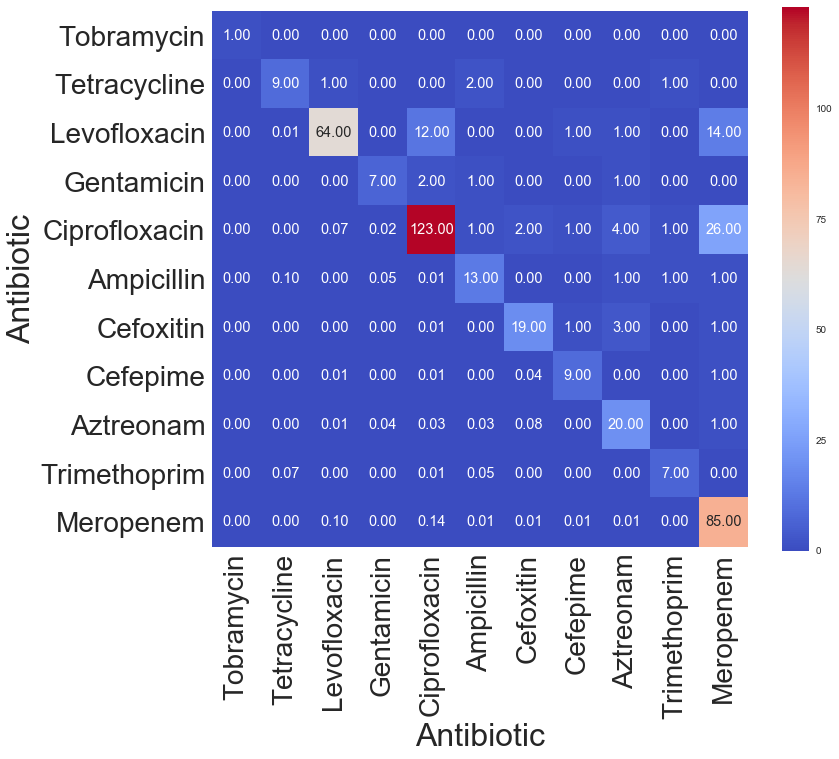

In [173]:
plt.figure(figsize = (12,10))
plt.style.use('seaborn')

# create heatmaps of overlap between genes in each groups
clustergrid = sns.heatmap(df_ab_all2, annot = True, cmap = 'coolwarm', fmt = '.2f', square = True, annot_kws={"size": 14.5})
plt.ylabel('Antibiotic', fontsize = 32)
plt.xlabel('Antibiotic', fontsize = 32)
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
#plt.savefig("Figure3A_2_bothdir.eps", format = 'eps', bbox_inches="tight") 
#plt.savefig("Figure3A_2_bothdir.svg", format = 'svg', bbox_inches="tight") 
plt.show()

### Pie chart showing metabolic systems enrichment in each antibiotic (Figure 3c)

In [174]:
# group together subsystems into cell wall, nucloetides, amino acids, carbohydrate metabolism & transport
systems = {}
systems['Cell Wall'] =  ['Murein Biosynthesis',
                         'Cell Envelope Biosynthesis', 
                         'Lipopolysaccharide Biosynthesis / Recycling',
                         'Glycerophospholipid Metabolism', 
                         'Murein Recycling',
                            'Membrane Lipid Metabolism']
                        
systems['Nucleotides Metabolism'] = ['Nucleotide Salvage Pathway',
                                     'Folate Metabolism',
                                     'Purine and Pyrimidine Biosynthesis']
                        
systems['Amino Acid Metabolism'] = ['Arginine and Proline Metabolism',
                                    'Valine, Leucine, and Isoleucine Metabolism',
                                    'Tyrosine, Tryptophan, and Phenylalanine Metabolism',
                                    'Alanine and Aspartate Metabolism',
                                    'Histidine Metabolism',
                                    'Cysteine Metabolism',
                                    'Glycine and Serine Metabolism', 
                                    'Threonine and Lysine Metabolism', 
                                   'Glutamate Metabolism', 
                                   'Methionine Metabolism']

systems['Carbohydrate Metabolism'] = ['Anaplerotic Reactions', 
                                     'Citric Acid Cycle',
                                     'Glycolysis/Gluconeogenesis',
                                     'Pyruvate Metabolism',
                                     'Pentose Phosphate Pathway',
                                     'Glyoxylate Metabolism', 
                                     'Methylglyoxal Metabolism']

systems['Transport'] = ['Transport, Outer Membrane Porin', 
                        'Transport, Outer Membrane',
                        'Transport, Inner Membrane']

systems['Alternative Carbon Metabolism'] = ['Alternate Carbon Metabolism']
systems['Cofactor and Prosthetic Group Metabolism'] = ['Cofactor and Prosthetic Group Biosynthesis']
systems['Energy metabolism'] = ['Oxidative Phosphorylation']
systems['Inorganic Transport and Metabolism'] = ['Inorganic Ion Transport and Metabolism']
systems['Nitrogen Metabolism'] = ['Nitrogen Metabolism']

In [175]:

df_genes_ss = pd.DataFrame(index = genes_ALL)

count = 0
for s, subs in systems.items():
 
    s_genes = []
    for g in genes_ALL:
        g_s = 0
        for r in m.genes.get_by_id(g).reactions:
            if r.subsystem in subs:
                g_s = 1
        s_genes.append(g_s)
    #print(s)
    df_genes_ss.insert(count, column = s, value = s_genes)

# number of times each antibiotic has a gene in a particular system
df_AB_ss_bin = df_AB_all_bin.T.dot(df_genes_ss)

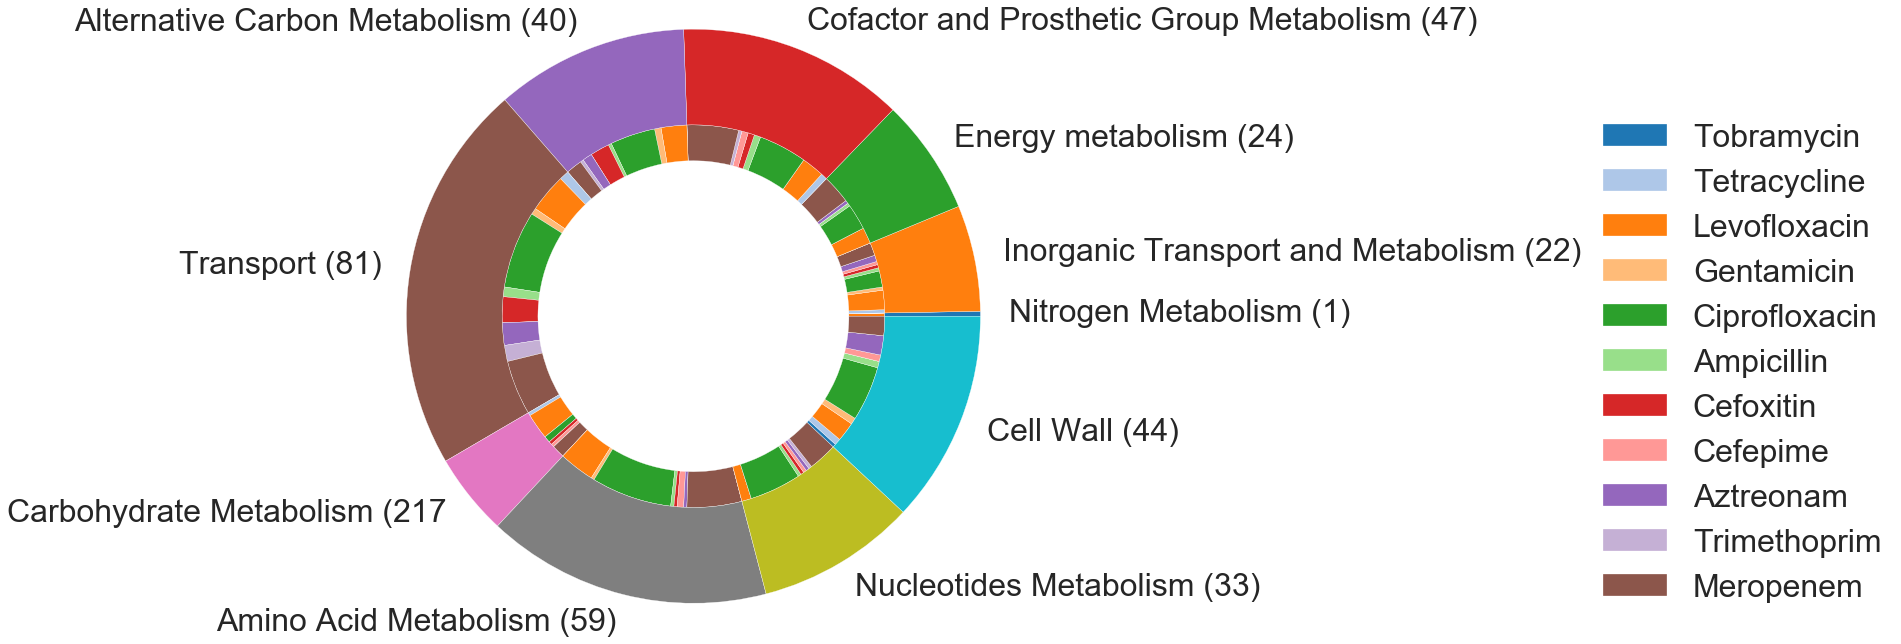

In [176]:
fig, ax = plt.subplots()

size = 0.3

a = df_AB_ss_bin['Nitrogen Metabolism']
b = df_AB_ss_bin['Inorganic Transport and Metabolism']
c = df_AB_ss_bin['Energy metabolism']
d = df_AB_ss_bin['Cofactor and Prosthetic Group Metabolism']
e = df_AB_ss_bin['Alternative Carbon Metabolism']
f = df_AB_ss_bin['Transport']
g = df_AB_ss_bin['Carbohydrate Metabolism']
h = df_AB_ss_bin['Amino Acid Metabolism']
i = df_AB_ss_bin['Nucleotides Metabolism']
j = df_AB_ss_bin['Cell Wall']

#systems_keys = ['NM (1)', 'ITM (8)','EM (4)','CPGM (21)','ACM (19)','T (40)','CM (7)','AAM (9)','NM (6)','CWM (30)']



systems_keys = ['Nitrogen Metabolism (1)', 'Inorganic Transport and Metabolism (22)','Energy metabolism (24)','Cofactor and Prosthetic Group Metabolism (47)','Alternative Carbon Metabolism (40)','Transport (81)','Carbohydrate Metabolism (217','Amino Acid Metabolism (59)','Nucleotides Metabolism (33)','Cell Wall (44)']
vals = np.array([a, b, c, d, e, f, g, h, i, j])


antibiotics = list(a.index)



cmap = plt.get_cmap('tab10')
outer_colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
cmap2 = plt.get_cmap('tab20')
inner_colors = cmap2(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))

ax.pie(vals.flatten(), radius=1.6, colors=inner_colors, wedgeprops=dict(width=0.3, edgecolor='w'), textprops={'fontsize': 14})


ax.pie(vals.sum(axis=1), radius=2.4, colors = outer_colors,
       wedgeprops=dict(width=0.8, edgecolor='w'), labels=systems_keys, textprops={'fontsize': 32})

plt.legend(antibiotics, loc=(3.5, -0.5), prop={'size': 32})
plt.show()

#fig.savefig('Figure3C_bothdir.svg', format = 'svg', bbox_inches="tight")

### Heatmap showing the metabolic system with the highest weight in each antibiotic class (Figure 3d)

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

[Text(1, 0.5, 'Transport'),
 Text(1, 1.5, 'Cell Wall'),
 Text(1, 2.5, 'Cofactor and Prosthetic Group Metabolism'),
 Text(1, 3.5, 'Amino Acid Metabolism'),
 Text(1, 4.5, 'Alternative Carbon Metabolism'),
 Text(1, 5.5, 'Nitrogen Metabolism'),
 Text(1, 6.5, 'Energy metabolism'),
 Text(1, 7.5, 'Nucleotides Metabolism'),
 Text(1, 8.5, 'Inorganic Transport and Metabolism'),
 Text(1, 9.5, 'Carbohydrate Metabolism')]

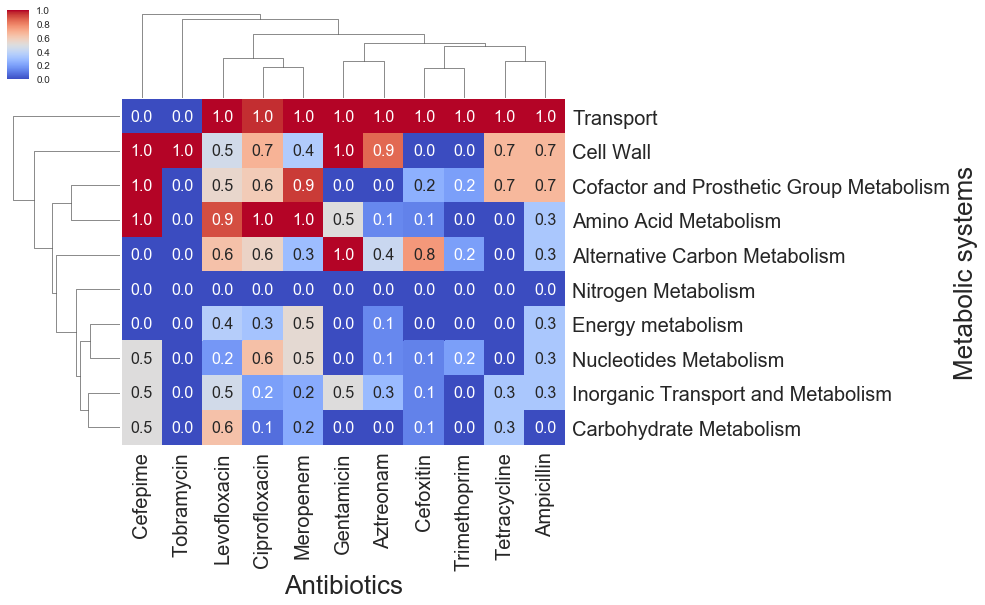

In [177]:
df_AB_ss = df_AB_all_bin.T.dot(df_genes_ss)


g = sns.clustermap(df_AB_ss.T, standard_scale = 1, annot = True, fmt = '.1f', method = 'average', cmap = 'coolwarm', row_cluster=True, col_cluster=True, square=False, figsize = (10,8), annot_kws={"size": 16})
sns.set(font_scale=3.0)
sns.set(font='arial')
plt.xticks(fontsize = 22)
g.ax_heatmap.set_xlabel('Antibiotics', fontsize = 26)
g.ax_heatmap.set_ylabel('Metabolic systems', fontsize = 26)


g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 20)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 20)

#plt.savefig('Figure3D_bothdir.eps', format = 'eps', bbox_inches="tight")
#plt.savefig('Figure3D_bothdir.svg', format = 'svg', bbox_inches="tight")

### Supplementary Figure 3 - number of genes

In [178]:
### KMERS
total_features = {}
total_genes = {}
features10 = {}
genes10 = {}
genes10_gsm = {}

for a in antibiotics_kmers:
    total_features[a] = len(antibiotics_kmers[a]['kmer number']) # non-zero
    genes = []
    for gene in antibiotics_kmers[a]['Gene ID']:
        genes.append(gene)
    genes_uni = list(set(genes))
    total_genes[a] = len(genes_uni)

for a in antibiotics_kmers10:
    features10[a] = len(antibiotics_kmers10[a]['kmer number'])
    genes = []
    for gene in antibiotics_kmers10[a]['Gene ID']:
        genes.append(gene)
    genes_uni = list(set(genes))
    genes10[a] = len(genes_uni)
    
    genes_gsm = []
    for ind, g in enumerate(antibiotics_kmers10[a]['Locus Tag'][0:kmers10[a]]):
            if str(g) != 'nan':
                for gene in m.genes:
                    if gene.id != 's0001':
                        if gene.id in g or gene.name in g:
                            genes_gsm.append(gene.id)
                            
    # unique genes
    genes10_gsm[a] = len(list(set(genes_gsm)))
    


    
genes_mapped = {}
for a in antibiotics_kmers10:
    genes = []
    for i in antibiotics_kmers10[a]['Gene Name']:
        if str(i) != 'nan' and str(i) != '':
            genes.append(i)
    genes_mapped[a] = len(list(set(genes)))
    

0
1


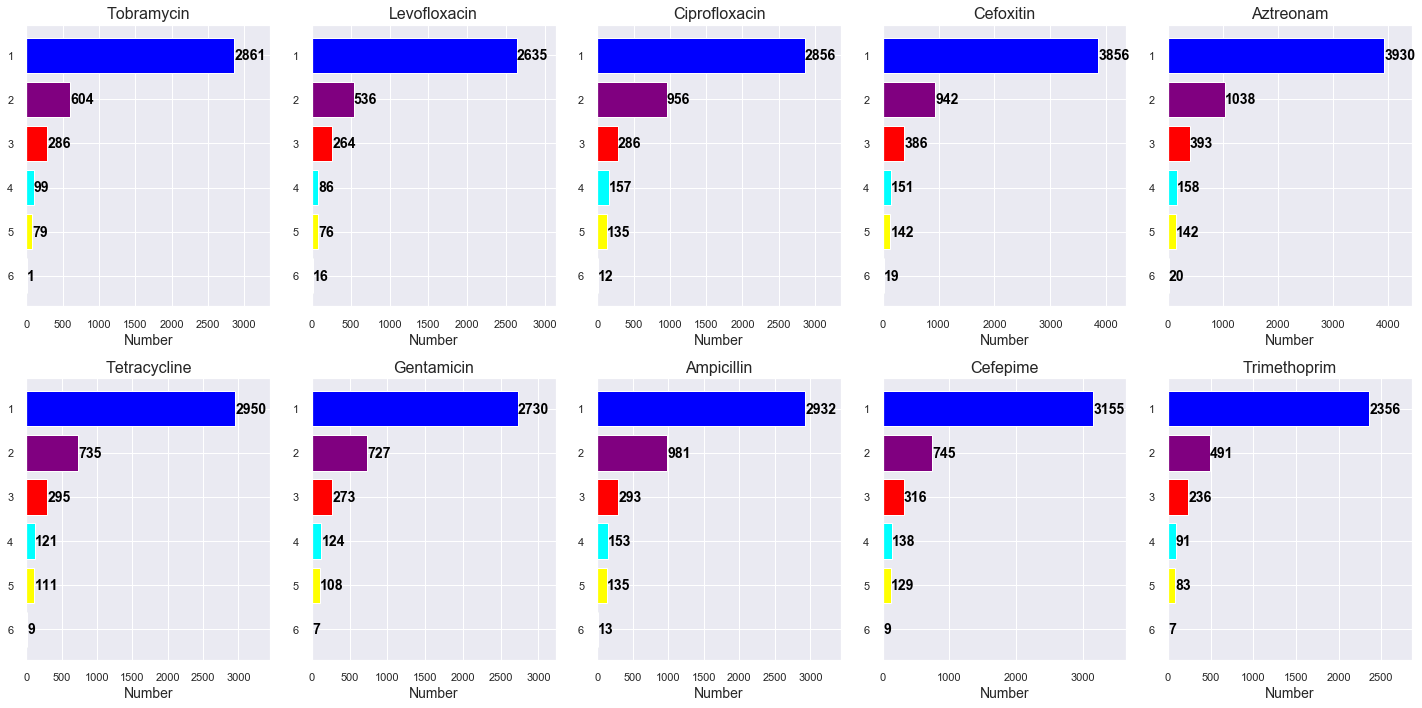

In [179]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for ind, a in enumerate(antibiotics_kmers10):

    labels = ['1', '2', '3', '4', '5', '6']
    data = [total_features[a], total_genes[a], features10[a], genes10[a], genes_mapped[a], genes10_gsm[a]]
    if ind < 2:
        axs[ind,0].barh(labels, data, color=['blue', 'purple', 'red', 'cyan', 'yellow', 'green'])
        for i, v in enumerate(data):
            axs[ind,0].text(v + 3, i +0.1, str(v), color='black', fontweight='bold', fontsize = 14)
        axs[ind,0].invert_yaxis()
        axs[ind, 0].set_xlim(0, total_features[a]+500)
        axs[ind, 0].set_title(a, fontsize = 16)
        axs[ind, 0].set_xlabel('Number', fontsize = 14)
    elif ind > 1 and ind < 4:
        index = ind - 2
        axs[index,1].barh(labels, data, color=['blue', 'purple', 'red', 'cyan', 'yellow', 'green'])
        for i, v in enumerate(data):
            axs[index,1].text(v + 3, i +0.1, str(v), color='black', fontweight='bold', fontsize = 14)
        axs[index, 1].invert_yaxis()
        axs[index, 1].set_xlim(0, total_features[a]+500)        
        axs[index, 1].set_title(a, fontsize = 16)
        axs[index, 1].set_xlabel('Number', fontsize = 14)
    
    elif ind > 3 and ind < 6:
        index = ind - 4
        print(index)
        axs[index,2].barh(labels, data, color=['blue', 'purple', 'red', 'cyan', 'yellow', 'green'])
        for i, v in enumerate(data):
            axs[index,2].text(v + 3, i +0.1, str(v), color='black', fontweight='bold', fontsize = 14)
        axs[index, 2].invert_yaxis()
        axs[index, 2].set_xlim(0, total_features[a]+500)        
        axs[index, 2].set_title(a, fontsize = 16)
        axs[index, 2].set_xlabel('Number', fontsize = 14)
        
    elif ind > 5 and ind < 8:
        index = ind - 6
        axs[index,3].barh(labels, data, color=['blue', 'purple', 'red', 'cyan', 'yellow', 'green'])
        for i, v in enumerate(data):
            axs[index,3].text(v + 3, i +0.1, str(v), color='black', fontweight='bold', fontsize = 14)
        axs[index, 3].invert_yaxis()
        axs[index, 3].set_xlim(0, total_features[a]+500)        
        axs[index, 3].set_title(a, fontsize = 16)
        axs[index, 3].set_xlabel('Number', fontsize = 14)
        
    elif ind > 7 and ind < 10:
        index = ind - 8
        axs[index,4].barh(labels, data, color=['blue', 'purple', 'red', 'cyan', 'yellow', 'green'])
        for i, v in enumerate(data):
            axs[index,4].text(v + 3, i +0.1, str(v), color='black', fontweight='bold', fontsize = 14)
        axs[index, 4].invert_yaxis()
        axs[index, 4].set_xlim(0, total_features[a]+500)        
        axs[index, 4].set_title(a, fontsize = 16)
        axs[index, 4].set_xlabel('Number', fontsize = 14)



plt.tight_layout()
plt.show()
#fig.savefig('SuppFig_pipelinefeatures_bothdir.svg', format = 'svg', bbox_inche="tight")
#fig.savefig('SuppFig_pipelinefeatures_bothdir.eps', format = 'svg', bbox_inche="tight")

In [213]:
### SNPS

In [180]:
total_features_snps = {}
total_genes_snps = {}
features10_snps = {}
genes10_snps = {}
genes10_gsm_snps = {}

for a in antibiotics_snps:
    total_features_snps[a] = len(antibiotics_snps[a]['gene'])
    genes = []
    for gene in antibiotics_snps[a]['gene']:
        genes.append(gene)
    genes_uni = list(set(genes))
    total_genes_snps[a] = len(genes_uni)

for a in antibiotics_snps10:
    features10_snps[a] = len(antibiotics_snps10[a]['gene'])
    genes = []
    for gene in antibiotics_snps10[a]['gene']:
        genes.append(gene)
    genes_uni = list(set(genes))
    genes10_snps[a] = len(genes_uni)
    
    genes_gsm = []
    for ind, g in enumerate(antibiotics_snps10[a]['Locus Tag'][0:snps10[a]]):
            if str(g) != 'nan':
                for gene in m.genes:
                    if gene.id != 's0001':
                        if gene.id in g or gene.name in g:
                            genes_gsm.append(gene.id)
                            
    # unique genes
    genes10_gsm_snps[a] = len(list(set(genes_gsm)))
    
    
genes_mapped_snps = {}
for a in antibiotics_snps10:
    genes = []
    for i in antibiotics_snps10[a]['gene']:
        if str(i) != 'nan' and str(i) != '':
            genes.append(i)
    genes_mapped_snps[a] = len(list(set(genes)))

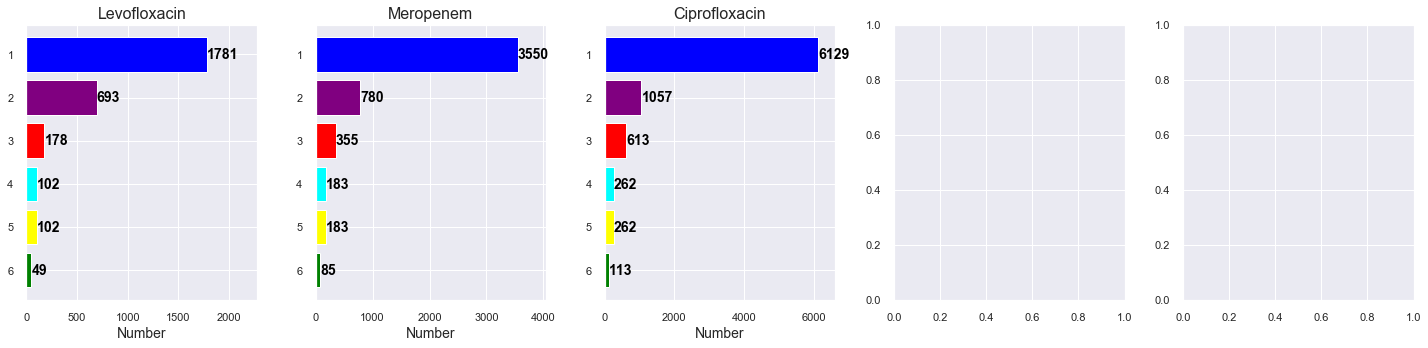

In [181]:
fig, axs = plt.subplots(1,5, figsize=(20,5))
for ind, a in enumerate(antibiotics_snps10):

    labels = ['1', '2', '3', '4', '5', '6']
    data = [total_features_snps[a], total_genes_snps[a], features10_snps[a], genes10_snps[a], genes_mapped_snps[a], genes10_gsm_snps[a]]
    if ind < 4:
        axs[ind].barh(labels, data, color=['blue', 'purple', 'red', 'cyan', 'yellow', 'green'])
        for i, v in enumerate(data):
            axs[ind].text(v + 3, i +0.1, str(v), color='black', fontweight='bold', fontsize = 14)
        axs[ind].invert_yaxis()
        axs[ind].set_xlim(0, total_features_snps[a]+500)
        axs[ind].set_title(a, fontsize = 16)
        axs[ind].set_xlabel('Number', fontsize = 14)



plt.tight_layout()
plt.show()
#fig.savefig('SuppFig_pipelinefeatures_snps_bothdir.svg', format = 'svg', bbox_inches="tight")
#fig.savefig('SuppFig_pipelinefeatures_snps_bothdir.eps', format = 'svg', bbox_inches="tight")

### Pathway enrichment analysis

In [182]:
## function for getting the number of genes in each pathway
def genes_in_system(m, systems, genes):
    
    subsystems = {}
    for sys, subsys in systems.items():
        for j in subsys:
            genes_subsys = []
            for r in m.reactions:
                if r.subsystem == j:
                    for g in r.genes:
                        if g.id in genes:
                            genes_subsys.append(g.id)
            subsystems[j] = list(set(genes_subsys))
    return subsystems

                    

In [183]:
# for entire set of genes
N = len(m.genes) # number of genes in the model
M = len(genes_ALL) # number of genes in the 

# number of genes in entire model vs number of genes in ML results for each pathway
## get the number of genes in each pathway
m_subsystems = genes_in_system(m, systems, genes_ALL)
n_subsystems = genes_in_system(m, systems, m.genes)




p_value = []
p_val_name = []
for i, j in systems.items():
    for ss in j:
        p = stats.hypergeom.sf(len(m_subsystems[ss]), N, len(n_subsystems[ss]), M)
        print(len(m_subsystems[ss]), len(n_subsystems[ss]))
        #if p < 0.05:
        print(ss, p)
        p_value.append(p)
        p_val_name.append(ss)
    
print('')       
print('corrected significance:')       

    
from operator import itemgetter
indices, pval_sorted = zip(*sorted(enumerate(p_value), key=itemgetter(1)))
for ind, i in enumerate(pval_sorted):
    if i < ((ind+1)/40)*0.05:
        print(p_val_name[indices[ind]], i, ((ind+1)/40)*0.05)
        #print(((ind)/40)*0.05 )
print('')

4 19
Murein Biosynthesis 0.28814967171682215
10 58
Cell Envelope Biosynthesis 0.5626002845874052
13 59
Lipopolysaccharide Biosynthesis / Recycling 0.21909963820859488
2 24
Glycerophospholipid Metabolism 0.8649007559686817
9 40
Murein Recycling 0.2172134925498774
2 17
Membrane Lipid Metabolism 0.6569282252220232
18 100
Nucleotide Salvage Pathway 0.549711272955307
3 10
Folate Metabolism 0.1042635362464412
6 25
Purine and Pyrimidine Biosynthesis 0.18325912347456003
17 42
Arginine and Proline Metabolism 0.0002774735574133861
2 17
Valine, Leucine, and Isoleucine Metabolism 0.6569282252220232
3 24
Tyrosine, Tryptophan, and Phenylalanine Metabolism 0.6996780619353141
3 13
Alanine and Aspartate Metabolism 0.22374882322030887
8 9
Histidine Metabolism 3.00249921656029e-07
8 27
Cysteine Metabolism 0.05525383621477726
3 21
Glycine and Serine Metabolism 0.5893160724051341
6 27
Threonine and Lysine Metabolism 0.24323335265519166
0 9
Glutamate Metabolism 0.8517929096423005
4 21
Methionine Metabolism 

### pathway enrichment using BioCyc pathways


In [184]:
gene_pathways = pd.read_excel('Data/Gene_pathways2.xlsx', sheet_name='Sheet1')


In [185]:
modelgene_pathways = {}
for i in m.genes:
    pathways = []
    if i.name in list(gene_pathways['column 1']):
        for ind, gene in enumerate(gene_pathways['column 1']):
            if i.name == gene:
                if str(gene_pathways['Pathways of gene'][ind]) != 'nan':
                    pathways = gene_pathways['Pathways of gene'][ind].split(' // ')
        modelgene_pathways[i.id] = pathways

In [186]:
pathways = []
for i, j in modelgene_pathways.items():
    for path in j:
        pathways.append(path)
        
pathways = list(set(pathways))
len(pathways)

405

In [187]:
length_pathway = {}
for i in pathways:
    no_pathways = 0
    for gene, paths in modelgene_pathways.items():
        if i in paths:
            no_pathways += 1
    length_pathway[i] = no_pathways
            

In [188]:
pathways2 = []
for path, length in length_pathway.items():
    if length > 1:
        pathways2.append(path)

In [190]:

p_value = []
p_val_name = []
p_length = []
for i in pathways2:
    number_genes_ml = 0.0
    number_genes_model = 0.0
    for gene, j in modelgene_pathways.items():
        for path in j:
            if i == path:
                if gene in genes_ALL:
                    number_genes_ml += 1.0
                if gene in m.genes:
                    number_genes_model += 1.0
    

    p = stats.hypergeom.sf(number_genes_ml, len(m.genes), number_genes_model, 296)
    if p < 0.05:
        print(i, p, number_genes_ml, number_genes_model)
    
    p_value.append(p)
    p_val_name.append(i)
    p_length.append(number_genes_model)

print('')       
print('corrected significance:')       
import numpy as np
    
from operator import itemgetter
indices, pval_sorted = zip(*sorted(enumerate(p_value), key=itemgetter(1)))
for ind, i in enumerate(pval_sorted):
    if i < ((ind+1)/352)*0.01:
        print(p_val_name[indices[ind]], i, (ind+1/352)*0.01)
        #print((ind+1/352)*0.01) # 352 if remove pathways with only 1 gene in 

4-amino-2-methyl-5-diphosphomethylpyrimidine biosynthesis I 0.03801910534063757 1.0 2.0
L-serine biosynthesis I 0.007382838157309791 2.0 3.0
L-homoserine biosynthesis 0.02524218227865324 2.0 4.0
5-aminoimidazole ribonucleotide biosynthesis I 0.0060441747972143495 3.0 5.0
tRNA-uridine 2-thiolation and selenation (bacteria) 0.03801910534063757 1.0 2.0
pyrimidine deoxyribonucleosides degradation 0.03801910534063757 1.0 2.0
cadaverine biosynthesis 0.03801910534063757 1.0 2.0
superpathway of 5-aminoimidazole ribonucleotide biosynthesis 0.0013907861538783861 4.0 6.0
tetrahydrofolate biosynthesis 0.02524218227865324 2.0 4.0
fucose degradation 0.007382838157309791 2.0 3.0
2-carboxy-1,4-naphthoquinol biosynthesis 0.0040903679098920655 4.0 7.0
hydrogen to trimethylamine N-oxide electron transfer 0.017381029398085116 4.0 9.0
superpathway of arginine and polyamine biosynthesis 0.005348109092162699 8.0 19.0
superpathway of polyamine biosynthesis I 0.0040903679098920655 4.0 7.0
superpathway of sulfa